## 1. 사용할 패키지 불러오기

In [38]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').get_name()
rc('font', family=font_name)

## 2. 데이터 불러오기

In [3]:
data = pd.read_csv('data.csv')
data.head()

,HUMAN ID,성별,ISO나이,나이,오른쪽어깨경사각,왼쪽어깨경사각,머리위로뻗은주먹높이,키,눈높이,목뒤높이,...,왼쪽상체근육발달,오른쪽상체근육발달,왼쪽하체근육발달,오른쪽하체근육발달,몸통근육발달,왼쪽상체체지방,오른쪽상체체지방,왼쪽하체체지방,오른쪽하체체지방,몸통체지방
0,120100196,남,7.48,7,18.0,22.0,1543.0,1330.0,1215.0,1111.0,...,표하,표하,표하,표하,표하,표상,표상,표상,표상,표상
1,120100197,남,7.07,7,24.0,26.0,1305.0,1160.0,1053.0,970.0,...,표준,표준,표상,표상,표준,표준,표준,표준,표준,표하
2,120100198,남,7.49,7,16.0,26.0,1487.0,1243.0,1131.0,1021.0,...,표하,표준,표하,표하,표준,표상,표준,표준,표준,표하
3,120100199,남,7.32,7,31.0,26.0,1280.0,1144.0,1020.0,913.0,...,표하,표하,표하,표하,표상,표상,표상,표상,표상,표하
4,120100200,남,6.71,7,19.0,24.0,1480.0,1277.0,1165.0,1055.0,...,표준,표준,표하,표하,표준,표상,표상,표상,표상,표상


## 3. 데이터 전처리

### (1) 결측치가 있는 ID 제거

In [4]:
data.isnull().sum()

HUMAN ID       0
성별             0
ISO나이          0
나이             0
오른쪽어깨경사각       0
            ... 
왼쪽상체체지방     1122
오른쪽상체체지방    1122
왼쪽하체체지방     1122
오른쪽하체체지방    1122
몸통체지방       1122
Length: 157, dtype: int64

#### 5000개 이상 결측치가 있는 변수 제거

In [5]:
del data['젖꼭지사이수평길이']
del data['젖가슴아래둘레']
del data['목옆젖꼭지길이']

#### 결측치 제거

In [6]:
data = data.dropna().reset_index(drop = True)

### (2) 독립 변수와 종속 변수 분리

In [7]:
independent_variable = ['키','몸무게','BMI','가슴너비','허리너비','엉덩이너비','목둘레','가슴둘레','배둘레','허리둘레','엉덩이둘레','장딴지둘레','종아리최소둘레']
target_variable = ['체지방률', '체지방률평가']

### (3) 변수 사이의 상관관계 확인

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: Use

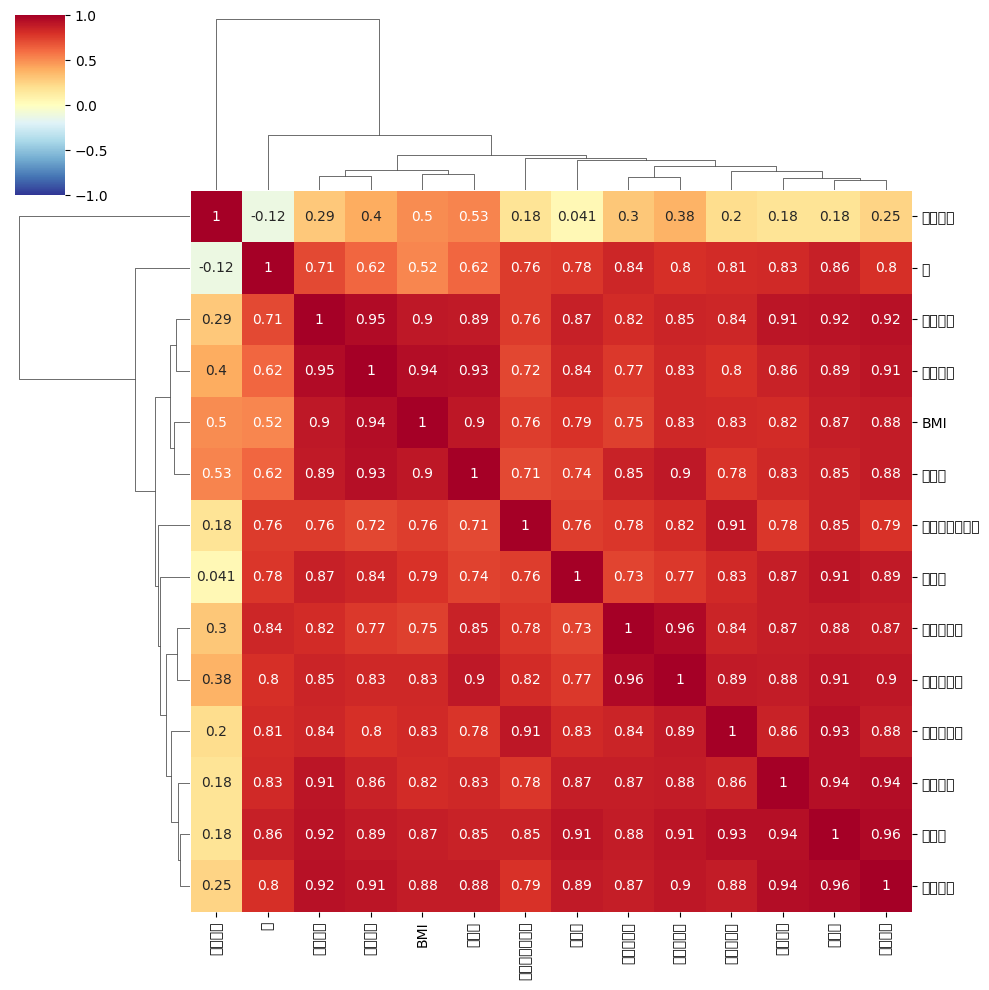

In [8]:
corr_data = data.loc[:, independent_variable + ['체지방률']]
corr_data = corr_data.corr()

sns.clustermap(corr_data, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

### (4) 연속형 변수 정규화 (Min-max 정규화)

In [8]:
X = data.loc[:, independent_variable]

minmax_scaler = MinMaxScaler()
minmax_scaler = minmax_scaler.fit_transform(X)
X.loc[:, independent_variable] = minmax_scaler
X.head()

,키,몸무게,BMI,가슴너비,허리너비,엉덩이너비,목둘레,가슴둘레,배둘레,허리둘레,엉덩이둘레,장딴지둘레,종아리최소둘레
0,0.318058,0.169143,0.261468,0.203791,0.254851,0.303896,0.226244,0.252308,0.317147,0.289969,0.344715,0.311787,0.311085
1,0.124923,0.029714,0.100917,0.075829,0.035152,0.102932,0.149321,0.115385,0.065250,0.092476,0.092683,0.110266,0.075874
2,0.219219,0.077714,0.146789,0.213270,0.241669,0.191160,0.180995,0.170769,0.154780,0.163009,0.182114,0.231939,0.159336
3,0.106746,0.035429,0.142202,0.203791,0.145002,0.112735,0.226244,0.110769,0.078907,0.095611,0.141463,0.133080,0.151749
4,0.257846,0.232000,0.481651,0.345643,0.432208,0.382320,0.330317,0.352308,0.438311,0.414546,0.414634,0.395437,0.447659


### (5) 체지방률평가에 따른 T-SNE

#### - 2차원

In [ ]:
# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(X)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

# class target 정보 불러오기 
tsne_df['target'] = data['체지방률평가']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '표준']
tsne_df_1 = tsne_df[tsne_df['target'] == '경비']
tsne_df_2 = tsne_df[tsne_df['target'] == '비만']

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = '표준')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = '경비')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = '비만')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()


#### - 3차원

In [ ]:
# 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(X)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['target'] = data['체지방률평가']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '표준']
tsne_df_1 = tsne_df[tsne_df['target'] == '경비']
tsne_df_2 = tsne_df[tsne_df['target'] == '비만']

# target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = '표준')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = '경비')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = '비만')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

### (6) 종속 변수 Label-Encoding

In [10]:
labels = ['표준', '경비', '비만']
data['체지방률평가'] = data['체지방률평가'].apply(lambda x: labels.index(x))

### (7) Train Test 분할

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, data['체지방률평가'], test_size=0.3, random_state=17)

## 4. 머신러닝 모델

In [27]:
ACC_list = []
F1_list = []

### (1) 선형 회귀 분석

In [28]:
reg_model = LogisticRegression().fit(train_X, train_y)

/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### - Test 성능 관찰

In [29]:
test_predict = reg_model.predict(test_X)

ACC_list.append(accuracy_score(test_y, test_predict))
F1_list.append(f1_score(test_y, test_predict, average='micro'))

print("Accuracy: {}".format(accuracy_score(test_y, test_predict)))
print("F1 Score: {}".format(f1_score(test_y, test_predict, average='micro')))

Accuracy: 0.6809637278263172
F1 Score: 0.6809637278263172


/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/

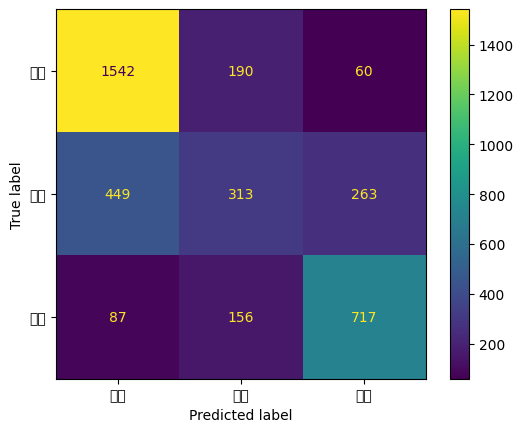

In [30]:
plot_confusion_matrix(reg_model, test_X, test_y,  display_labels = labels)  

### (2) 의사결정 나무

#### - 하이퍼 파라미터 튜닝

In [34]:
max_depth_candidate = [3, 5, 7, 9, 11]
min_samples_split_candidate = [5, 7, 9, 11, 13]

# 결과를 저장할 빈 리스트 생성
max_depth_list = []
min_samples_split_list = []
train_score_list = []
val_score_list = []

# Decision Tree의 max_depth 파라미터에 대해서
for max_depth in max_depth_candidate:
    # Decision Tree의 min_samples_split 파라미터에 대해서
    for min_samples_split in min_samples_split_candidate:
        # 모델 생성 및 학습
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state = 1004).fit(train_X, train_y)
        # Train 데이터에 대한 결과 확인
        train_predict = model.predict(train_X)
        train_score_list.append(accuracy_score(train_y, train_predict))
        # Test 데이터에 대한 결과 확인
        test_predict = model.predict(test_X)
        val_score_list.append(accuracy_score(test_y, test_predict))
        # Parameter 저장
        max_depth_list.append(max_depth)
        min_samples_split_list.append(min_samples_split)
            
result = pd.DataFrame({"max_depth": max_depth_list, "min_samples_split": min_samples_split_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result   

,max_depth,min_samples_split,Train Score,Test Score
0,3,5,0.616432,0.609478
1,3,7,0.616432,0.609478
2,3,9,0.616432,0.609478
3,3,11,0.616432,0.609478
4,3,13,0.616432,0.609478
5,5,5,0.674989,0.657135
6,5,7,0.674989,0.657135
7,5,9,0.674989,0.657135
8,5,11,0.674989,0.657135
9,5,13,0.674989,0.657135


In [35]:
result = result.loc[result['Test Score'] == max(result['Test Score']), :].reset_index(drop = True)
dt_model = DecisionTreeClassifier(max_depth=result['max_depth'][0], min_samples_split=result['min_samples_split'][0], random_state = 1004).fit(train_X, train_y)
result

,max_depth,min_samples_split,Train Score,Test Score
0,7,5,0.716296,0.658194
1,7,7,0.716296,0.658194
2,7,9,0.716296,0.658194
3,7,11,0.716296,0.658194


#### - Test 성능 관찰

In [36]:
test_predict = dt_model.predict(test_X)

ACC_list.append(accuracy_score(test_y, test_predict))
F1_list.append(f1_score(test_y, test_predict, average='micro'))

print("Accuracy: {}".format(accuracy_score(test_y, test_predict)))
print("F1 Score: {}".format(f1_score(test_y, test_predict, average='micro')))

Accuracy: 0.6581943341276145
F1 Score: 0.6581943341276145


/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/

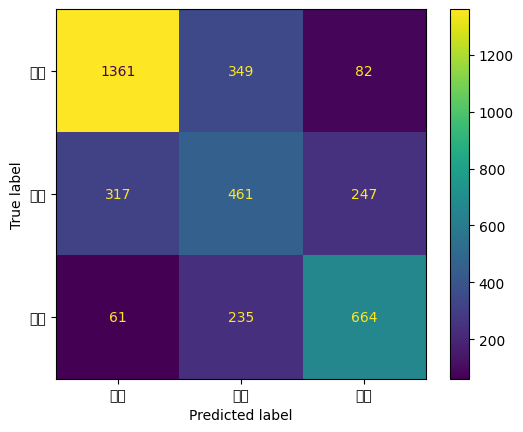

In [37]:
plot_confusion_matrix(dt_model, test_X, test_y,  display_labels = labels)  

### (3) SVM

#### - 하이퍼 파라미터 튜닝

In [39]:
kernel_candidate = ['linear', 'rbf', 'poly']
C_candidate = [1, 10, 100]

# 결과를 저장할 빈 리스트 생성
kernel_list = []
C_list = []
train_score_list = []
val_score_list = []

# SVR의 kernel 파라미터에 대해서
for kernel in kernel_candidate:
    # SVR의 C 파라미터에 대해서
    for C in C_candidate:
        # 모델 생성 및 학습
        model = SVC(kernel=kernel, C=C).fit(train_X, train_y)
        # Train 데이터에 대한 결과 확인
        train_predict = model.predict(train_X)
        train_score_list.append(accuracy_score(train_y, train_predict))
        # Test 데이터에 대한 결과 확인
        test_predict = model.predict(test_X)
        val_score_list.append(accuracy_score(test_y, test_predict))
        # Parameter 저장
        kernel_list.append(kernel)
        C_list.append(C)
            
result = pd.DataFrame({"kernel": kernel_list, "C": C_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result   

,kernel,C,Train Score,Test Score
0,linear,1,0.680549,0.678316
1,linear,10,0.684748,0.682288
2,linear,100,0.686337,0.681228
3,rbf,1,0.705742,0.691819
4,rbf,10,0.721403,0.705057
5,rbf,100,0.744666,0.697114
6,poly,1,0.693032,0.684935
7,poly,10,0.700068,0.690760
8,poly,100,0.710849,0.697644


In [41]:
result = result.loc[result['Test Score'] == max(result['Test Score']), :].reset_index(drop = True)
svm_model = SVC(kernel=result['kernel'][0], C=result['C'][0]).fit(train_X, train_y).fit(train_X, train_y)
result

,kernel,C,Train Score,Test Score
0,rbf,10,0.721403,0.705057


#### - Test 성능 관찰

In [42]:
test_predict = svm_model.predict(test_X)

ACC_list.append(accuracy_score(test_y, test_predict))
F1_list.append(f1_score(test_y, test_predict, average='micro'))

print("Accuracy: {}".format(accuracy_score(test_y, test_predict)))
print("F1 Score: {}".format(f1_score(test_y, test_predict, average='micro')))

Accuracy: 0.7050569234842468
F1 Score: 0.7050569234842468


/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/

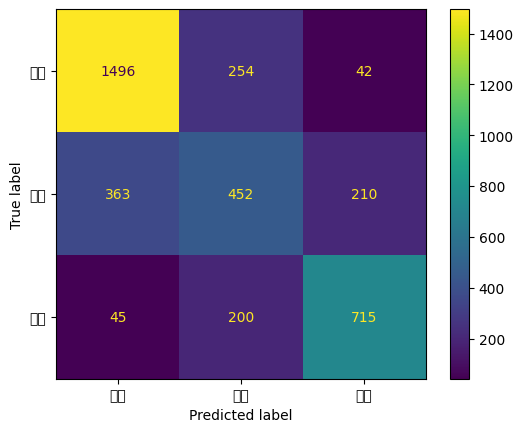

In [43]:
plot_confusion_matrix(svm_model, test_X, test_y,  display_labels = labels)  

#### - Test 성능 관찰

### (4) Random Forest

#### - 하이퍼 파라미터 튜닝

In [44]:
n_estimators_candidate = [100, 300,500]
max_depth_candidate = [3, 5, 7]
min_samples_split_candidate = [5, 7, 9]

# 결과를 저장할 빈 리스트 생성
n_estimators_list = []
max_depth_list = []
min_samples_split_list = []
train_score_list = []
val_score_list = []

# Random Forest의 n_estimators 파라미터에 대해서
for n_estimators in n_estimators_candidate:
    # Random Forest의 max_depth 파라미터에 대해서
    for max_depth in max_depth_candidate:
        # Random Forest의 min_samples_split 파라미터에 대해서
        for min_samples_split in min_samples_split_candidate:
            # 모델 생성 및 학습
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state = 1004).fit(train_X, train_y)
            # Train 데이터에 대한 결과 확인
            train_predict = model.predict(train_X)
            train_score_list.append(accuracy_score(train_y, train_predict))
            # Test 데이터에 대한 결과 확인
            test_predict = model.predict(test_X)
            val_score_list.append(accuracy_score(test_y, test_predict))
            # Parameter 저장
            n_estimators_list.append(n_estimators)
            max_depth_list.append(max_depth)
            min_samples_split_list.append(min_samples_split)
            
result = pd.DataFrame({"n_estimators": n_estimators_list, "max_depth": max_depth_list, "min_samples_split": min_samples_split_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result   

,n_estimators,max_depth,min_samples_split,Train Score,Test Score
0,100,3,5,0.625851,0.624305
1,100,3,7,0.625851,0.624305
2,100,3,9,0.625851,0.624305
3,100,5,5,0.689287,0.674345
4,100,5,7,0.689628,0.673815
5,100,5,9,0.689628,0.672227
6,100,7,5,0.730708,0.685994
7,100,7,7,0.728892,0.688112
8,100,7,9,0.729006,0.685729
9,300,3,5,0.625738,0.625364


In [45]:
result = result.loc[result['Test Score'] == max(result['Test Score']), :].reset_index(drop = True)
rf_model = RandomForestClassifier(n_estimators=result['n_estimators'][0], max_depth=result['max_depth'][0], min_samples_split=result['min_samples_split'][0], random_state = 1004).fit(train_X, train_y)
result

,n_estimators,max_depth,min_samples_split,Train Score,Test Score
0,500,7,9,0.730027,0.689701


#### - Test 성능 관찰

In [46]:
test_predict = rf_model.predict(test_X)

ACC_list.append(accuracy_score(test_y, test_predict))
F1_list.append(f1_score(test_y, test_predict, average='micro'))

print("Accuracy: {}".format(accuracy_score(test_y, test_predict)))
print("F1 Score: {}".format(f1_score(test_y, test_predict, average='micro')))

Accuracy: 0.6897008207572147
F1 Score: 0.6897008207572147


/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/home/jongwook95.lee/miniforge3/envs/ml_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
/home/

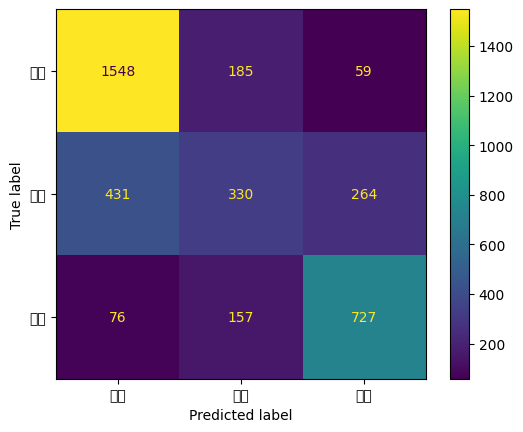

In [47]:
plot_confusion_matrix(rf_model, test_X, test_y,  display_labels = labels)  

### (5) XGBoost

#### - 하이퍼 파라미터 튜닝

In [48]:
n_estimators_candidate = [100, 200, 300,400,500]
max_depth_candidate = [3, 5, 7, 9]
learning_rate_candidate = [0.1, 0.01, 0.001, 0.0001]

# 결과를 저장할 빈 리스트 생성
n_estimators_list = []
max_depth_list = []
learning_rate_list = []
train_score_list = []
val_score_list = []

# XGBoost의 n_estimators 파라미터에 대해서
for n_estimators in n_estimators_candidate:
    # XGBoost의 max_depth 파라미터에 대해서
    for max_depth in max_depth_candidate:
        # XGBoost의 learning_rate 파라미터에 대해서
        for learning_rate in learning_rate_candidate:
            # 모델 생성 및 학습
            model = xgboost.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, objective='reg:squarederror').fit(train_X, train_y)
            # Train 데이터에 대한 결과 확인
            train_predict = model.predict(train_X)
            train_score_list.append(accuracy_score(train_y, train_predict))
            # Test 데이터에 대한 결과 확인
            test_predict = model.predict(test_X)
            val_score_list.append(accuracy_score(test_y, test_predict))
            # Parameter 저장
            n_estimators_list.append(n_estimators)
            max_depth_list.append(max_depth)
            learning_rate_list.append(learning_rate)
            
result = pd.DataFrame({"n_estimators": n_estimators_list, "max_depth": max_depth_list, "learning_rate": learning_rate_list, 'Train Score': train_score_list, 'Test Score': val_score_list})
result                    

In [ ]:
result = result.loc[result['Test Score'] == max(result['Test Score']), :].reset_index(drop = True)
xgb_model = xgboost.XGBClassifier(n_estimators=result['n_estimators'][0], max_depth=result['max_depth'][0], learning_rate=result['learning_rate'][0], objective='reg:squarederror').fit(train_X, train_y)
result

,n_estimators,max_depth,learning_rate,Train Score,Test Score
0,200,5,0.1,2.75414,3.569193


#### - Test 성능 관찰

In [ ]:
test_predict = xgb_model.predict(test_X)

ACC_list.append(accuracy_score(test_y, test_predict))
F1_list.append(f1_score(test_y, test_predict, average='micro'))

print("Accuracy: {}".format(accuracy_score(test_y, test_predict)))
print("F1 Score: {}".format(f1_score(test_y, test_predict, average='micro')))

RMSE: 3.569192991146985
R2: 0.7671768896809998


Text(0.5, 0, 'true')

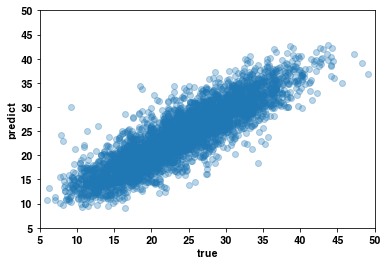

In [ ]:
plot_confusion_matrix(xgb_model, test_X, test_y,  display_labels = labels)  

## 5. 최종 성능 평가

In [59]:
Models = ['Linear Regression', 'Decision Tree', 'SVM', 'Random Forest', 'XGBoost']
final_result = pd.DataFrame({'Model': Models, 'Accuracy': ACC_list , 'F1 score': F1_list})
final_result

,Model,RMSE,R2
0,Linear Regression,3.764691,0.740973
1,Decision Tree,4.154514,0.684553
2,SVM,3.464524,0.780632
3,Random Forest,3.755588,0.742224
4,XGBoost,3.569193,0.767177


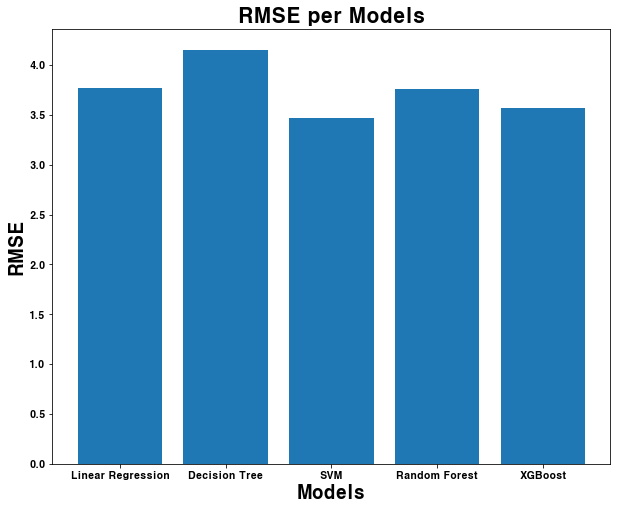

In [64]:
plt.figure(figsize=(10,8))
plt.bar(Models, ACC_list)
plt.title('RMSE per Models', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.show()

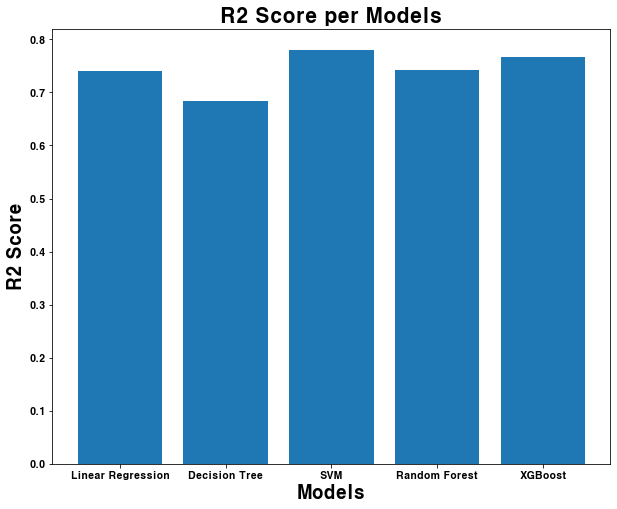

In [65]:
plt.figure(figsize=(10,8))
plt.bar(Models, F1_list)
plt.title('R2 Score per Models', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('R2 Score', fontsize=18)
plt.show()